In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화', '국제주의+세계적', '항일+민족', '폭력(무장)'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화', '국제주의+세계적', '항일+민족', '폭력(무장)']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

공화정 국가 수립 + 개혁적
['신경/NNG', '개성/NNG', '통재/NNG', '장님/NNG', '육군/NNG', '시체/NNG', '기념식/NNG', '쇠퇴/NNG', '효과/NNG', '육체/NNG', '육해군/NNG', '공민/NNG', '정오/NNG', '통상/MAG', '윤덕영/NNP', '곤궁/NNG', '홍/NNP', '간교/NNG', '정면/NNG', '강력/NNG', '기질/NNG', '들판/NNG', '원숭이/NNG', '설득/NNG', '원산/NNP', '낭독/NNG', '근/NNG', '이/MM', '쓸개/NNG', '물거품/NNG', '선전부/NNG', '씨/IC', '자유민보/NNG', '물산/NNG', '극동/NNP', '관심/NNG', '이리/MAG', '협력/NNG', '아들/NNG', '이리/MAG', '극단/NNG', '이목/NNG', '조리/NNG', '건전/NNG', '다리/NNG', '문관/NNG', '회계/NNG', '관문/NNG', '거울/NNG']
비폭력(비무장)+평화
['간부/NNG', '부총장/NNG', '총애/NNG', '총리/NNG', '휴학/NNG', '연설회/NNG', '부합/NNG', '대한국민의회/NNP', '주교/NNG', '국경/NNG', '염치/NNG', '최/NNP', '주소/NNG', '분별/NNG', '일본사회당/NNP', '보답/NNG', '예배/NNG', '예법/NNG', '번창/NNG', '구/NNG', '번영/NNG', '번성/NNG', '전북/NNP', '꾀/NNG', '교환/NNG', '교토/NNP', '추/VV', '전신/NNG', '존망/NNG', '존경/NNG', '굴욕/NNG', '임용/NNG', '폭도/NNG', '약탈/NNG']
국제주의+세계적
['지/EC', '출병/NNG', '이탈리아/NNP', '배포/NNG', '약소민족/NNG', '배신/NNG', '조화/NNG', '계승/NNG', '중간/NNG', '꼴/NNG', '전부/MAG', '추밀부/NNG', '종

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/독립기념관.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

선언서
우리들은 지금 우리 조선이 독립한 나라이고 조선 사람이 자주적인 국민이라는 것을 선언하노라 이러한 사실을 세계 여러 나라에 알려서 인류 평등이라고 하는 사람이라면 마땅히 지켜야할 도리를 분명히 밝히고 이러한 사실을 후손들에게 대대로 전하여 민족의 독자적 생존이라고 하는 정당한 권리를 영원히 누릴 수 있도록 하는 바이다
천년 역사의 권위에 의지하여 독립을 선언하는 것이며 이천만 민중의 충성을 한 데 모아서 독립국임을 널리 밝히는 것이다 영원하고 한결같은 민족의 자유 발달을 위하여 독립을 주장하는 것이며 인류의 양심이 드러남에 따라 일어난 세계 개조의 좋은 기회와 운세에 순응하여 함께 나아가기 위하여 이것을 제기하는 것이다 조선의 독립은 하늘의 밝으신 명령이고 시대의 추세이며 모든 인류가 공존하면서 함께 살아가야 한다는 정당한 권리를 발동한 것이니 세상의 무엇이라 할지라도 우리의 주장을 가로막거나 억눌러서 그치게 할 수 없을 것이다
우리가 낡은 시대의 유물인 침략주의와 강권주의의 희생물이 되어 역사가 시작된 지 수천년 만에 처음으로 이민족의 압제를 받는 뼈아픈 괴로움을 맛본지 이미 년이나 지났다 그동안 우리가 생존권을 빼앗겨 잃어버린 것이 얼마나 많았으며 마음과 영혼의 발전을 가로막힌 것이 얼마나 심하였던가 또한 민족의 존귀하고 영화로움이 훼손된 것이 얼마나 심하였으며 새롭고 독창적인 정신으로써 세계 문화의 큰 흐름에 기여하고 보탬이 될 기회와 인연을 잃어버린 것이 얼마나 심하였던가
아 과거로부터 내려온 억울함을 드러내어 세상에 널리 알리려고 하려면 현재 겪고 있는 고통에서 벗어나려고 하려면 장래의 위협을 일찌감치 무찔러 없애버리려고 하려면 억눌리고 사그라진 민족의 양심과 국가의 염치가 다시금 북받쳐 일어나 마음껏 뻗어날 수 있도록 하려면 각자의 인격이 정당한 발달을 이룰 수 있도록 하려면 가엾은 아들과 딸들에게 괴롭고 부끄러운 현실을 물려주지 않도록 하려면 만대에 이르는 자손들을 인도하여 영구적이고 완전한 행복을 맞이할 수 있도록 해주려면 무엇보다 시급한

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_42580\1508968365.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['선언서/NNG', '조선/NNP', '독립/NNG', '나라/NNG', '조선/NNP', '사람/NNG', '자주/NNG', '국민/NNG', '것/NNB', '선언/NNG', '사실/NNG', '세계/NNG', '나라/NNG', '인류/NNG', '평등/NNG', '사람/NNG', '도리/NNG', '사실/NNG', '후손/NNG', '민족/NNG']
['선언서/NNG', '우리/NP', '들/XSN', '은/JX', '지금/MAG', '우리/NP', '조선/NNP', '이/JKS', '독립/NNG', '하/XSV', 'ᆫ/ETM', '나라/NNG', '이/VCP', '고/EC', '조선/NNP', '사람/NNG', '이/JKS', '자주/NNG', '적/XSN', '이/VCP']
{'소리/NNG', '곤장/NNG', '짓/VV-I', '시급/XR', '나오/VV', '굉장/XR', '고하/VV', '철/NNG', '의/JKG', '도의/NNG', '널리/MAG', '마침내/MAG', '전국/NNG', '원나라/NNP', '날카롭/VA-I', '극히/MAG', '생각/NNG', '유쾌/NNG', '독립국/NNG', '처럼/JKB', '근심/NNG', '대황/NNP', '전투/NNG', '귀머거리/NNG', '탐닉/NNG', '정당/XR', '제한/NNG', '다/EC', '다시금/MAG', '리/NNB', '참정권/NNG', '토대/NNG', '풍부하/VA', '씨/NNB', '모/MM', '만드/VV', '쌓/VV', '아/JKV', '협조/NNG', '오/VV', '다니/VV', '동트/VV', '이슬/NNG', '쇠/NNG', '이종훈/NNP', '메리/NNG', '기차/NNG', '얼어붙/VV', '당하/VV', '기억/NNG', '막막/XR', '대부분/NNG', '나팔/NNG', '으면/EC', '결과/NNG', '맞/VV', '추위/NNG', '어/EC', '인/NNG', '유명/XR', '얻/VV-R', '멈추/VV', '한산도/NNP', 

<Axes: xlabel='n', ylabel='word'>

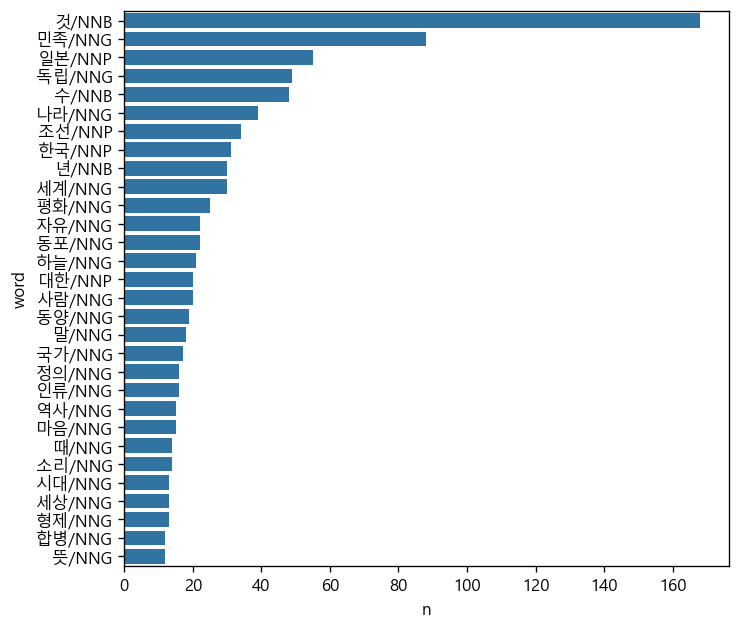

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

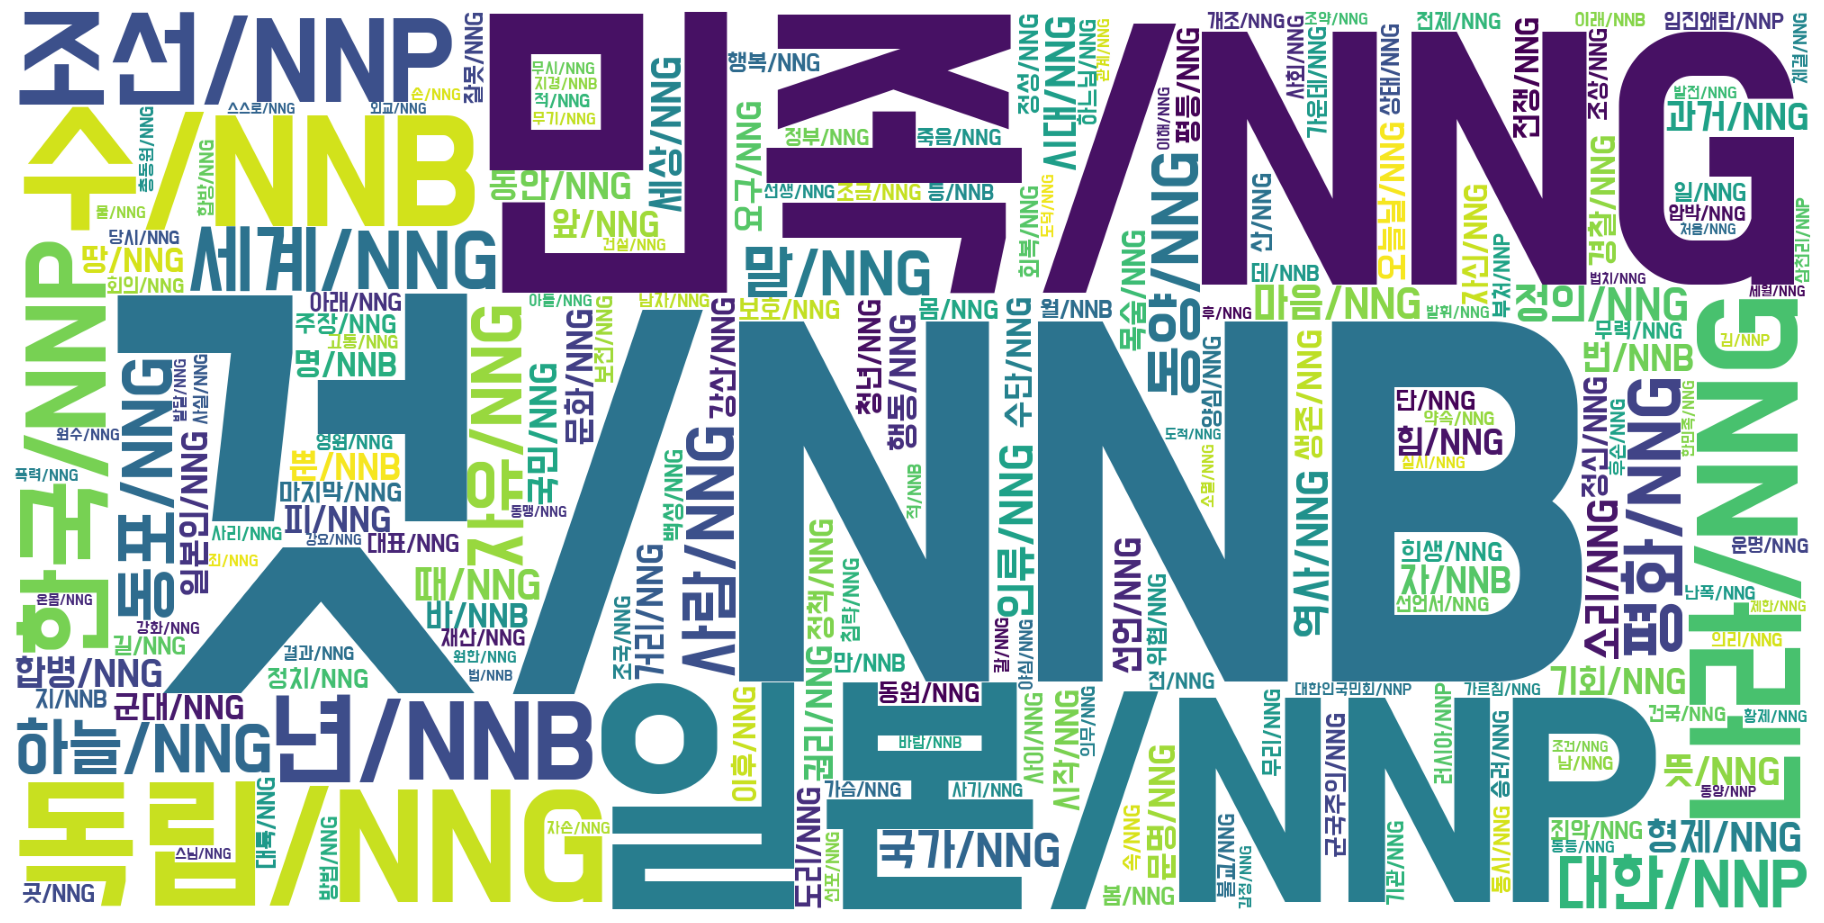

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  267  \
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                 268  269  270  271  272  273  274  275  276  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 277 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_42580\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0    1     2     3     4     5     6     7     8    9  ...  \
공화정 국가 수립 + 개혁적  0.0  0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0  0.0  ...   
비폭력(비무장)+평화      0.0  0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  0.0  ...   
국제주의+세계적         0.0  0.0   2.0   3.0   2.0   0.0   3.0   2.0   3.0  1.0  ...   
항일+민족            1.0  8.0  10.0  37.0  10.0  12.0  18.0  14.0  15.0  5.0  ...   
폭력(무장)           0.0  0.0   0.0   1.0   0.0   1.0   2.0   0.0   1.0  0.0  ...   

                 267   268   269  270   271  272  273  274  275  276  
공화정 국가 수립 + 개혁적  0.0   0.0   0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0  
비폭력(비무장)+평화      0.0   0.0   0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0   0.0   1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  
항일+민족            6.0  17.0  13.0  4.0  16.0  2.0  2.0  2.0  1.0  0.0  
폭력(무장)           0.0   1.0   0.0  1.0   0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 277 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_42580\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  1.752816  1.752816  0.000000   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
국제주의+세계적         0.000000  0.000000  1.528410  2.292615  1.528410  0.000000   
항일+민족            0.098565  0.788517  0.985646  3.646889  0.985646  1.182775   
폭력(무장)           0.000000  0.000000  0.000000  1.580966  0.000000  1.580966   

                        6         7         8         9  ...       267  \
공화정 국가 수립 + 개혁적  1.752816  0.000000  0.000000  0.000000  ...  0.000000   
비폭력(비무장)+평화      3.678107  0.000000  0.000000  0.000000  ...  0.000000   
국제주의+세계적         2.292615  1.528410  2.292615  0.764205  ...  0.000000   
항일+민족            1.774162  1.379904  1.478469  0.492823  ...  0.591387   
폭력(무장)           3.161932  0.000000  1.580966  0.000000  ...  0.000000   

                      268       269       270       271       272       273  \
공

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/독립기념관.csv")

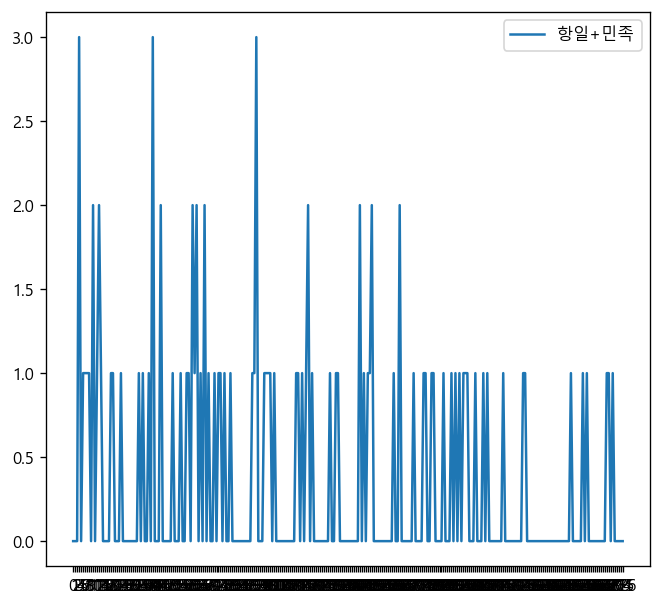

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

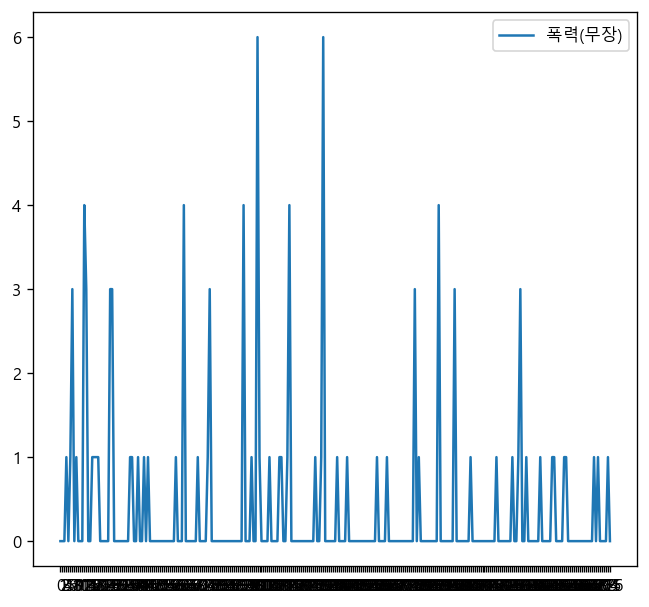

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

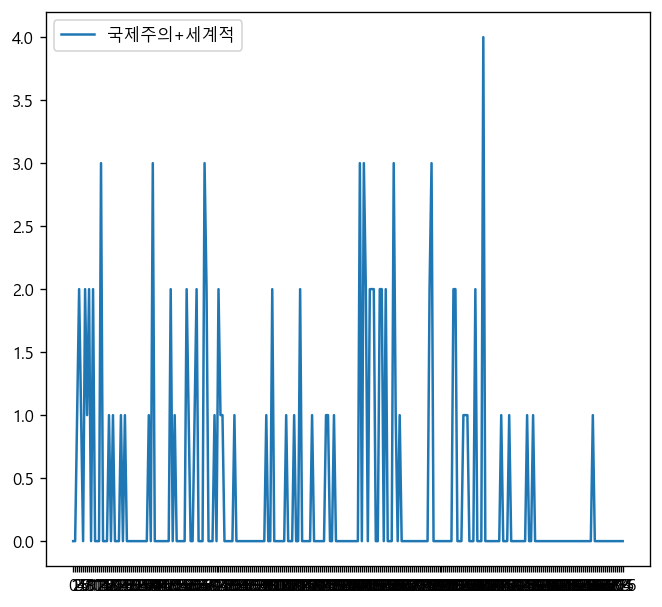

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

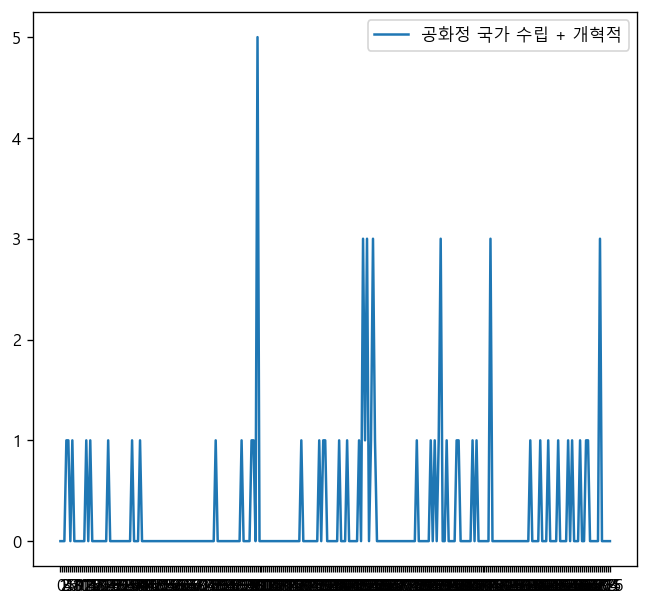

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

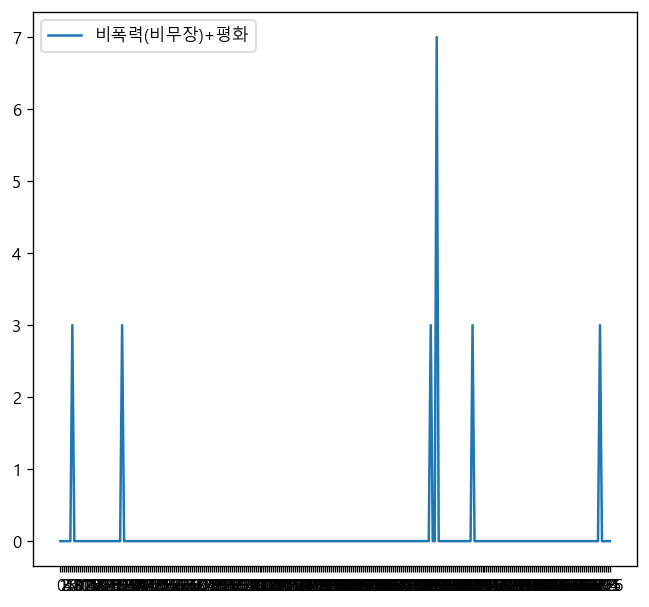

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

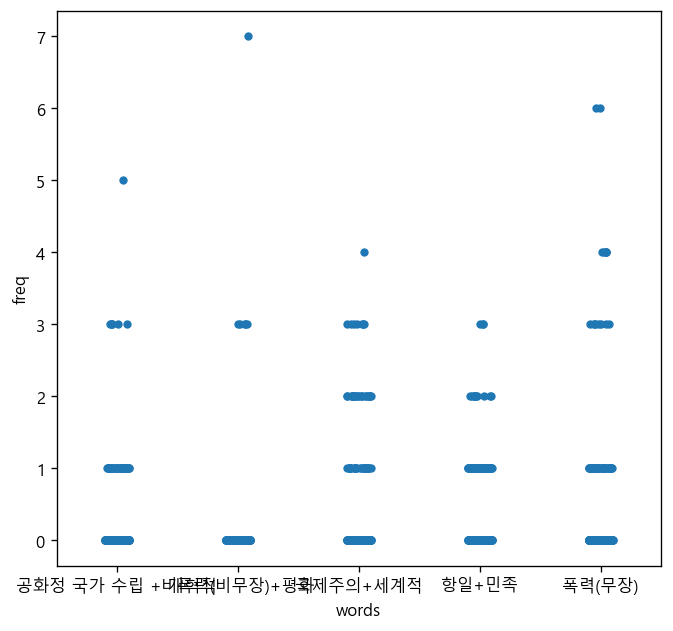

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

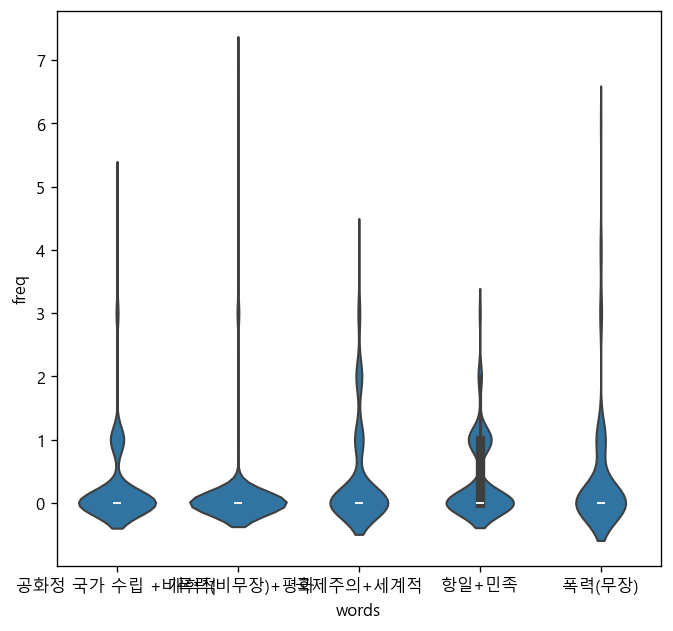

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

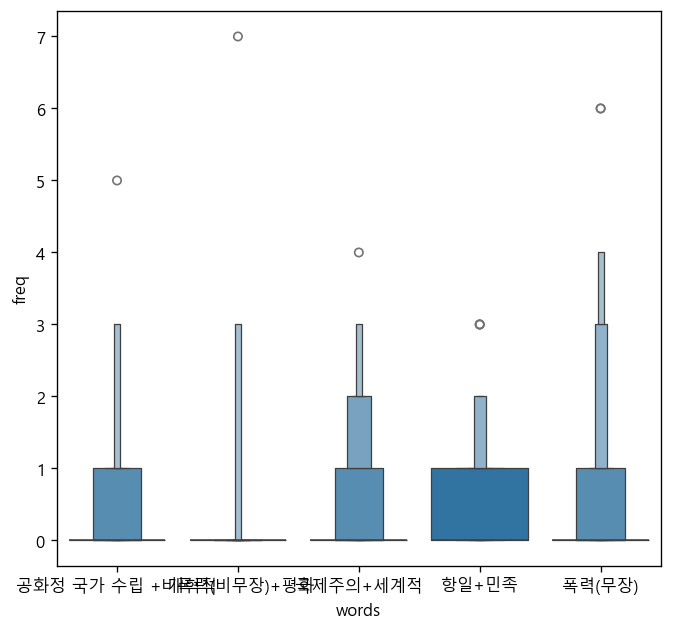

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)